In [1]:
from sklearn.linear_model import RidgeCV,LassoCV,Ridge,Lasso
from sklearn.svm import LinearSVR,SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
#没有用bagging和boosting
#stacking    先用几个不同的模型做预测  输出预测值  然后将这几个模型输出的预测值作为特征来训练一个新的模型

# 获取数据

In [2]:
data=pd.read_csv("data/onehot_feature.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196499 entries, 0 to 196498
Data columns (total 41 columns):
Unnamed: 0    196499 non-null int64
时间            196499 non-null int64
小区名           196499 non-null int64
小区房屋出租数量      196499 non-null float64
楼层            196499 non-null int64
总楼层           196499 non-null float64
房屋面积          196499 non-null float64
房屋朝向          196499 non-null object
居住状态          196499 non-null float64
卧室数量          196499 non-null int64
厅的数量          196499 non-null int64
卫的数量          196499 non-null int64
出租方式          196499 non-null float64
区             196499 non-null float64
位置            196499 non-null float64
地铁线路          196499 non-null float64
地铁站点          196499 non-null float64
距离            196499 non-null float64
装修情况          196499 non-null float64
月租金           196499 non-null float64
log_rent      196499 non-null float64
新朝向           196499 non-null object
房+卫+厅         196499 non-null int64
房/总           196499 non-null flo

In [3]:
#将离散特征转换成字符串类型
colunms = ['时间', '新小区名', '居住状态', '出租方式', '区','位置','地铁线路','地铁站点','装修情况','户型','聚类特征']
for col in colunms:
    data[col] = data[col].astype(str)

In [4]:
x_columns=['小区房屋出租数量','新小区名', '楼层', '总楼层', '房屋面积','居住状态', '卧室数量',
       '卫的数量',  '位置',  '地铁站点', '距离', '装修情况', 
       '新朝向', '房+卫+厅', '房/总', '卫/总', '厅/总', '卧室面积', '楼层比', '户型','平均值特征1',
       '平均值特征2','有地铁','小区线路数','位置线路数','小区条数大于100','小区平均值特征','朝向平均值特征',
           '站点平均值特征','位置平均值特征']
y_label='log_rent'
x=data[x_columns]
y=data[y_label]

In [5]:
#2.分割数据集
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=12)

In [6]:
#3.特征转换
vector=DictVectorizer(sparse=True)
x_train=vector.fit_transform(train_x.to_dict(orient='records'))
x_test=vector.transform(test_x.to_dict(orient='records'))

In [7]:
x_train.shape

(137549, 964)

In [8]:
#4.降维----线性回归和svm可以采用降维后的特征
pca=PCA(0.98)
pca_x_train=pca.fit_transform(x_train.toarray())
pca_x_test=pca.transform(x_test.toarray())

In [9]:
pca_x_train.shape

(137549, 407)

In [10]:
#5.特征标准化
trans=StandardScaler()
new_x_train=trans.fit_transform(pca_x_train)
new_x_test=trans.transform(pca_x_test)

In [11]:
new_x_train.shape

(137549, 407)

In [12]:
# ploy=PolynomialFeatures(degree=2,interaction_only=True)
# ploy_x_train=ploy.fit_transform(new_x_train)
# ploy_x_test=ploy.transform(new_x_test)

In [13]:
# ploy_x_train.shape

In [14]:
def rmse(y_true,y_pred):
    y_pred=np.exp(y_pred)-1#转换成真实的租金
    y_true=np.exp(y_true)-1
    return np.sqrt(mean_squared_error(y_true,y_pred))

# 构建子模型

## 构建岭回归模型

In [15]:
# #1.参数搜索
# ridge=Ridge()
# params={
#     "alpha":[0.005,0.01,1,5,10,20,50]

# }
# model1=GridSearchCV(ridge,param_grid=params,cv=5,n_jobs=-1)
# model1.fit(new_x_train,train_y)
# model1.best_params_   
# #{'alpha': 10, 'fit_intercept': True}

In [16]:
#利用搜索出的最优参数构建模型
ridge=Ridge(alpha=0.005)
ridge.fit(new_x_train,train_y)


Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [17]:
y_pred_test=ridge.predict(new_x_test)
y_pred_train=ridge.predict(new_x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 3.162947362147576
测试集rmse： 3.1450837952700987


## 构建lasso回归

In [18]:
# #1.参数搜索
# lasso=Lasso()
# params={
#     "alpha":[0.001,0.01,0.05,0.1,0.5,1,5,10],
#     "fit_intercept":[True,False] 
# }
# model2=GridSearchCV(lasso,param_grid=params,cv=5,n_jobs=-1)
# model2.fit(new_x_train,train_y)
# model2.best_params_
# #{'alpha': 0.001, 'fit_intercept': True}

In [19]:
#利用搜索出的最优参数构建模型
lasso=Lasso(alpha=0.001)
lasso.fit(new_x_train,train_y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
y_pred_test=lasso.predict(new_x_test)
y_pred_train=lasso.predict(new_x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 3.17469838175572
测试集rmse： 3.1600537035148


## 构建随机森林

In [55]:
# #1.参数搜索 
# rf=RandomForestRegressor(max_features='sqrt')#设置max_features='sqrt'，不然太耗时间
# params={
#     "n_estimators":[200],#[200,500,700],
#     "max_depth":[40,50,60],
#     "min_samples_split":[20,50,100],
#     "min_samples_leaf":[10,20,30]
# }
# model3=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1,verbose=2)
# model3.fit(x_train,train_y)
# model3.best_params_
# # {'max_depth': 50,
# #  'min_samples_leaf': 10,
# #  'min_samples_split': 20,
# #  'n_estimators': 200}

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 35.5min finished


{'max_depth': 50,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'n_estimators': 200}

In [ ]:
# import time
# print time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()) 

In [21]:
#利用搜索出的最优参数构建模型
rf=RandomForestRegressor(n_estimators=200,
                         max_features=0.8,
                         max_depth=50,
                         min_samples_split=20,
                         min_samples_leaf=10,
                         n_jobs=-1)
rf.fit(x_train,train_y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=0.8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [22]:
y_pred_test=rf.predict(x_test)
y_pred_train=rf.predict(x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 1.8016406346453875
测试集rmse： 2.078690010364972


## 构建决策树

In [93]:

# tree=DecisionTreeRegressor()
# params={
#     "max_depth":[40,50,60,70],
#     "min_samples_split":[5,10,20,30,40,50],
#     "min_samples_leaf":[2,3,5,7,9,11]
# }
# model4=GridSearchCV(tree,param_grid=params,cv=5,n_jobs=-1)
# model4.fit(x_train,train_y)
# model4.best_params_
# {'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 5}

{'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [94]:
from sklearn.tree import DecisionTreeRegressor
#利用搜索出的最优参数构建模型
tree=DecisionTreeRegressor(max_depth=60,min_samples_leaf=2,min_samples_split=5)
tree.fit(x_train,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=60, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [95]:
y_pred_test=tree.predict(x_test)
y_pred_train=tree.predict(x_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.7147616009940363
测试集rmse： 1.5876633153093507


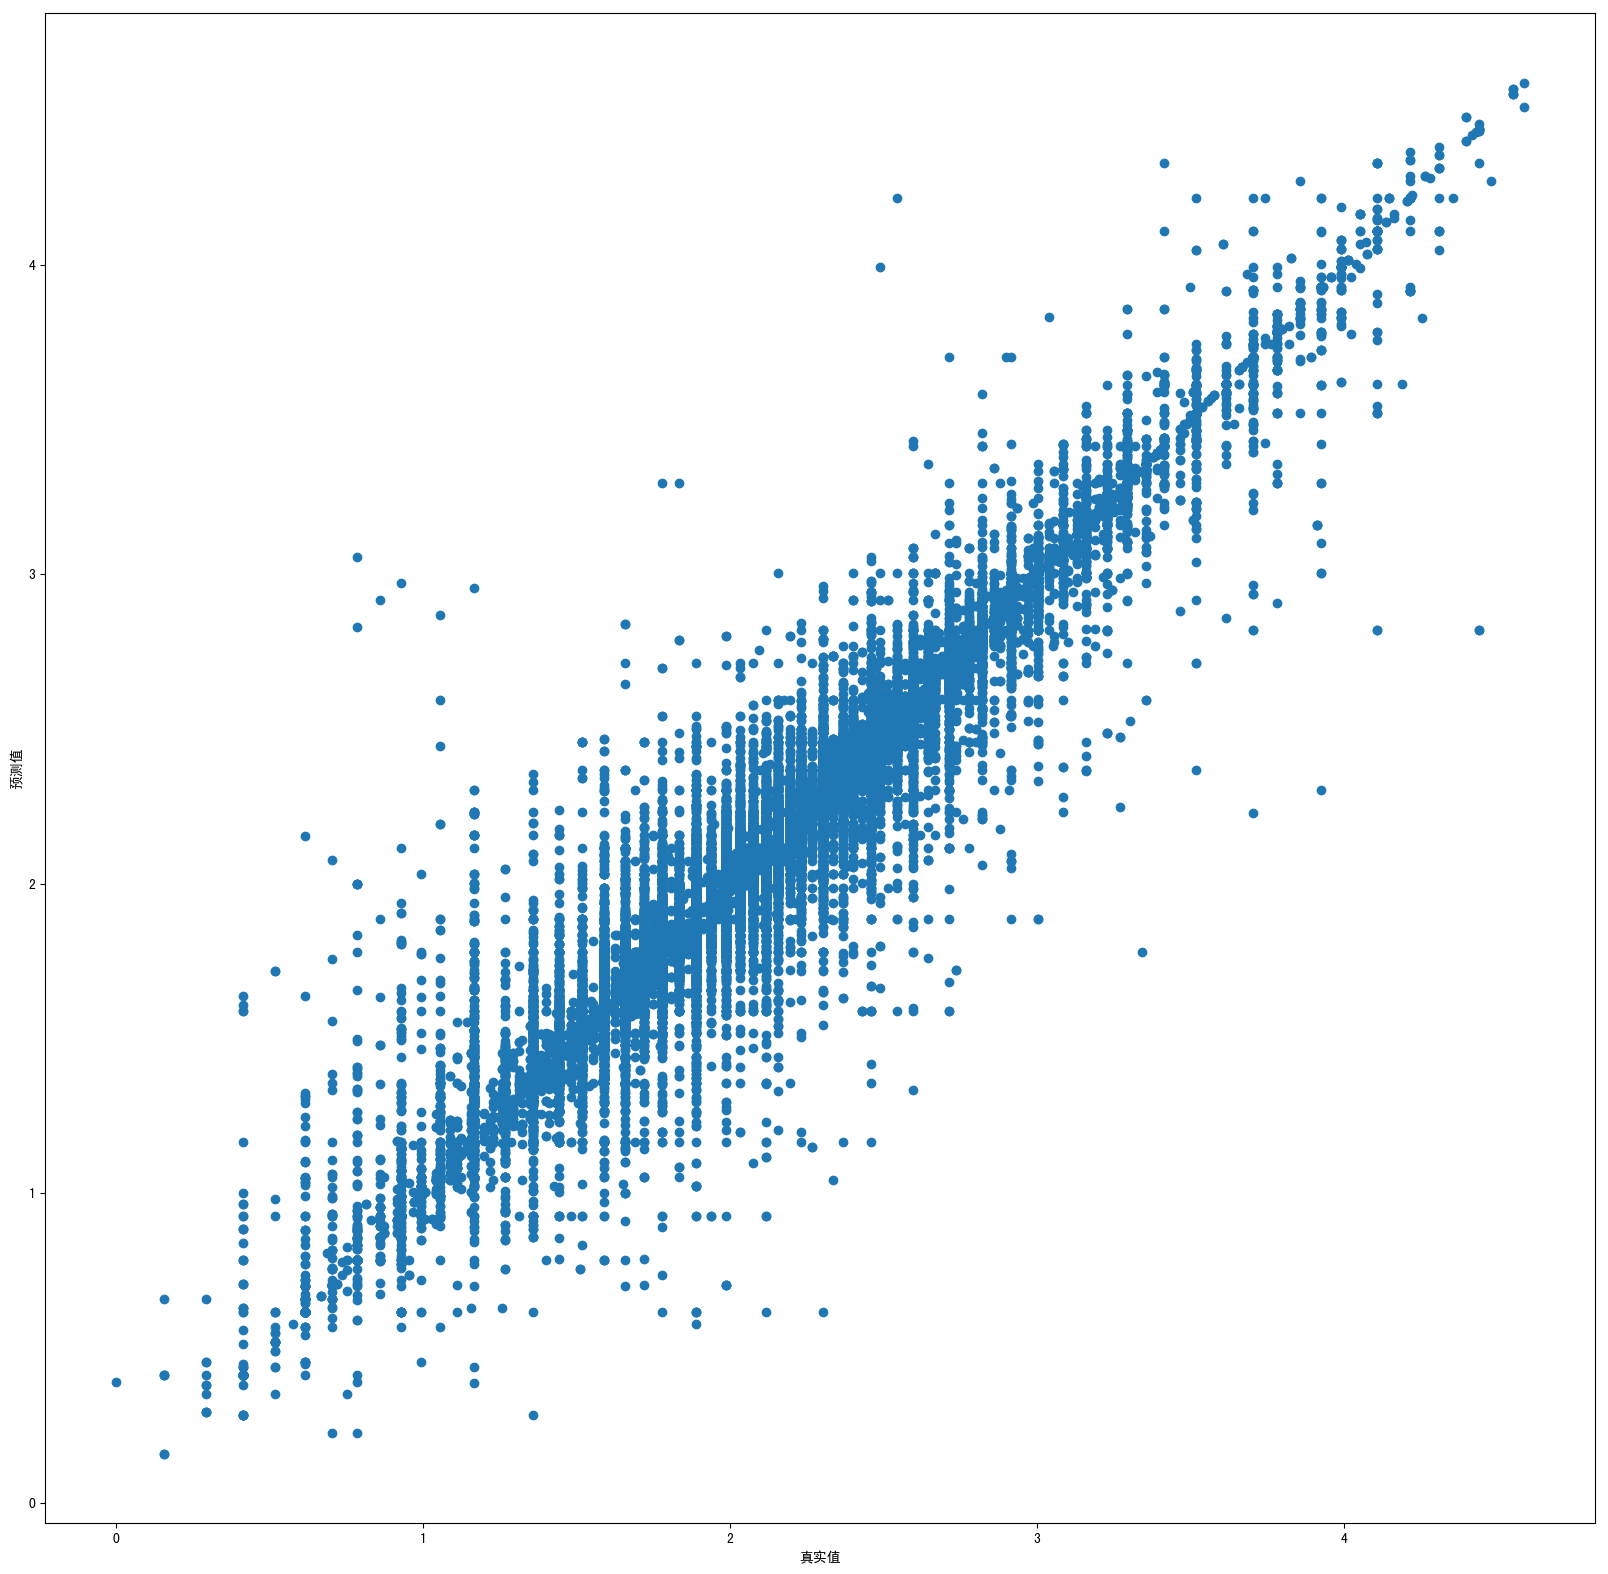

In [96]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

## 构建支持向量机

In [1]:
# #1.参数搜索----数据量大 svm太耗时，调参几乎不可能
# svr=SVR()
# params={
#     "gamma":[0.001,0.01,0.1,0.5,1,5],
#     "C":[0.001,0.1,0.5,1,5] 
# }
# model5=GridSearchCV(svr,param_grid=params,cv=5,n_jobs=-1,verbose=10)
# model5.fit(new_x_train,train_y)
# model5.best_params_

In [ ]:
# #随意选一组参数   --- 耗时太长 放弃该模型
# svr=SVR(gamma=0.1,C=0.5)
# svr.fit(new_x_train,train_y)
# y_pred=svr.predict(new_x_test)
# rmse(test_y,y_pred)

## 构建xgboost模型

In [25]:
import xgboost as xgb
params={
    "objective":'reg:linear',
    'eta':0.1,
    'gamma': 0.05,
    'silent': 1,
    'max_depth':45, 
    'min_child_weight':0.5,
    'sub_sample':0.6,
    'reg_alpha':0.5,
    'reg_lambda':0.8,
    'colsample_bytree':0.5
}
dtrain = xgb.DMatrix(x_train,train_y)
dtest = xgb.DMatrix(x_test,test_y)
bst = xgb.train(params, dtrain, num_boost_round=2000)

/root/anaconda3/envs/ml/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [66]:
y_pred_test=bst.predict(dtest)
y_pred_train=bst.predict(dtrain)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred_test))

训练集rmse： 0.8318620679177371
测试集rmse： 1.3412344636800162


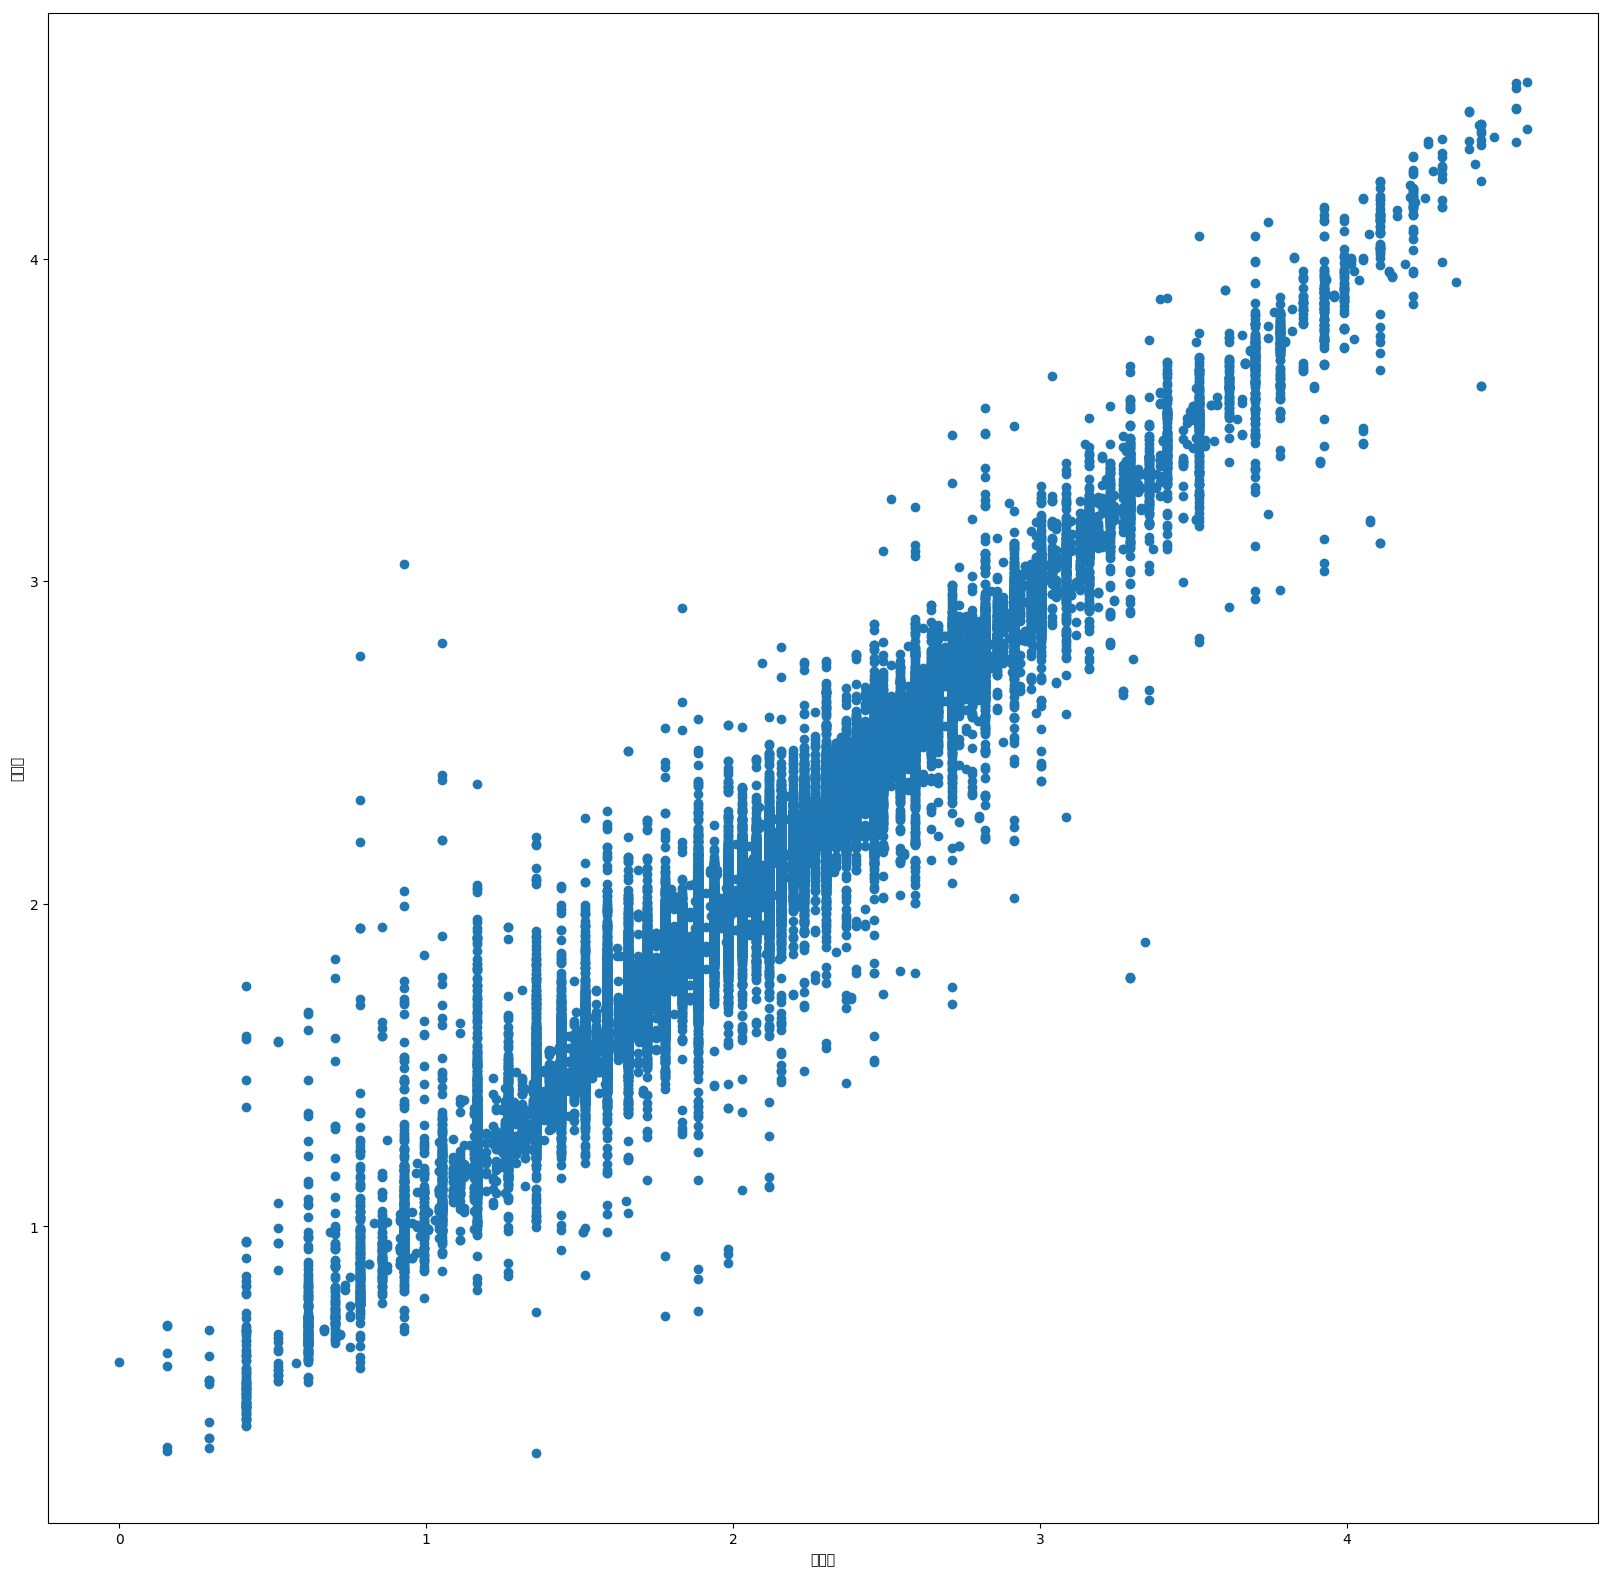

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20),dpi=100)
plt.scatter(test_y,y_pred_test)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.show()

# Stacking融合

In [97]:
#获取每个子模型的预测结果作为特征
train_features=[]
train_features.append(ridge.predict(new_x_train))#将每个模型预测值保存起来
train_features.append(lasso.predict(new_x_train))
# train_features.append(svr.predict(new_x_train))#这个太慢了  不要了
train_features.append(rf.predict(x_train))
train_features.append(tree.predict(x_train))
train_features.append(bst.predict(dtrain))

test_features=[]
test_features.append(ridge.predict(new_x_test))
test_features.append(lasso.predict(new_x_test))
# test_features.append(svr.predict(new_x_test))
test_features.append(rf.predict(x_test))
test_features.append(tree.predict(x_test))
test_features.append(bst.predict(dtest))





In [98]:

mx_train=np.vstack(train_features).T
mx_test=np.vstack(test_features).T
mx_train.shape

(137549, 5)

In [110]:

stack_model=Ridge(fit_intercept=False)
params={
    "alpha":np.logspace(-2,3,20)
}
model=GridSearchCV(stack_model,param_grid=params,cv=5,n_jobs=-1)
model.fit(mx_train,train_y)
model.best_params_

{'alpha': 0.20691380811147891}

In [120]:
stack_model=Ridge(alpha=0.206,fit_intercept=False)
stack_model.fit(mx_train,train_y)
y_pred=stack_model.predict(mx_test)
y_pred_train=stack_model.predict(mx_train)
print("训练集rmse：",rmse(train_y,y_pred_train))
print("测试集rmse：",rmse(test_y,y_pred))

训练集rmse： 0.6824409675644203
测试集rmse： 1.3588850206739824


In [121]:
stack_model.coef_

array([-0.01476048, -0.01601146,  0.04143987,  0.55925897,  0.43009737])

# 模型保存

In [ ]:
import pickle

with open("data/model.pkl","wb") as f:
    pickle.dump({
        "vector":vector,
        "pca":pca,
        "sc":trans,
        "ridge":ridge,
        "lasso":lasso,
        "rf":rf,
        "tree":tree,
        "bst":bst,
        "stack":stack_model
    },f)